<a href="https://colab.research.google.com/github/farsashraf/OOP/blob/main/MyCharity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [305]:
df = pd.read_csv("data.csv")

In [306]:
df.head()

,name,age,location,donated before,income,Religious preferences,prefer to donate to organizations,prefer to volunteer with organizations,prefer to donate money,prefer to donate material items,prefer health donations,prefer educational donations,prefer social donations,gender
0,Al -Manjawi Al -Zabalawi Al -Minyawi Issam,23,Damietta,no,3000,Yes,no,Yes,no,Yes,no,no,Yes,male
1,#VALUE!,22,Damietta,no,5000,no,Yes,no,Yes,no,Yes,no,Yes,male
2,Faris Ashraf Abu Aid,22,Damietta,no,4000,Yes,Yes,no,Yes,no,Yes,no,Yes,male
3,Alaa Abu Al -Saud,21,Dakahlia,Yes,2000,no,no,Yes,Yes,Yes,Yes,no,Yes,male
4,#VALUE!,21,Dakahlia,no,5000,no,Yes,no,Yes,Yes,Yes,Yes,Yes,male


In [307]:
df.drop('name', axis = 1 ,inplace=True )

In [308]:
df.head()

,age,location,donated before,income,Religious preferences,prefer to donate to organizations,prefer to volunteer with organizations,prefer to donate money,prefer to donate material items,prefer health donations,prefer educational donations,prefer social donations,gender
0,23,Damietta,no,3000,Yes,no,Yes,no,Yes,no,no,Yes,male
1,22,Damietta,no,5000,no,Yes,no,Yes,no,Yes,no,Yes,male
2,22,Damietta,no,4000,Yes,Yes,no,Yes,no,Yes,no,Yes,male
3,21,Dakahlia,Yes,2000,no,no,Yes,Yes,Yes,Yes,no,Yes,male
4,21,Dakahlia,no,5000,no,Yes,no,Yes,Yes,Yes,Yes,Yes,male


In [309]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [310]:
x = df

In [311]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])])

In [312]:
x_train = np.array(ct.fit_transform(x))

In [313]:
x_num = x_train

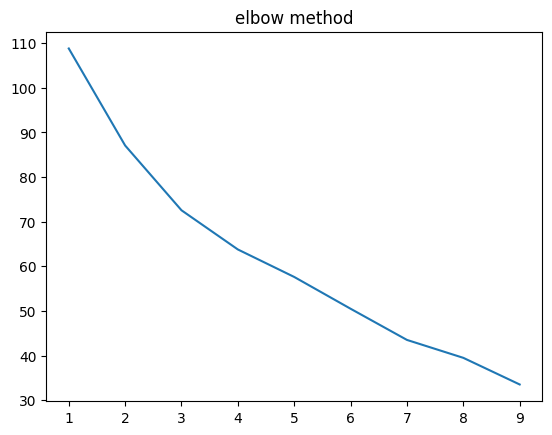

In [314]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

wclus = []
for i in range(1, 10):
  km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  km.fit(x_num)
  wclus.append(km.inertia_)

plt.plot(range(1, 10), wclus)
plt.title("elbow method")
plt.show()

In [315]:
km = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_predicted = km.fit_predict(x_num)

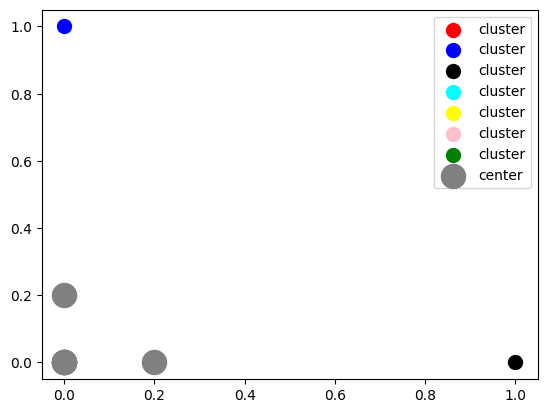

In [316]:
plt.scatter(x_num[y_predicted == 0 , 0], x_num[y_predicted == 0 , 1], s = 100 , c ='red', label = 'cluster')
plt.scatter(x_num[y_predicted == 1 , 0], x_num[y_predicted == 1 , 1], s = 100 , c ='blue', label = 'cluster')
plt.scatter(x_num[y_predicted == 2 , 0], x_num[y_predicted == 2 , 1], s = 100 , c ='black', label = 'cluster')
plt.scatter(x_num[y_predicted == 3 , 0], x_num[y_predicted == 3 , 1], s = 100 , c ='cyan', label = 'cluster')
plt.scatter(x_num[y_predicted == 4 , 0], x_num[y_predicted == 4 , 1], s = 100 , c ='yellow', label = 'cluster')
plt.scatter(x_num[y_predicted == 5 , 0], x_num[y_predicted == 5 , 1], s = 100 , c ='pink', label = 'cluster')
plt.scatter(x_num[y_predicted == 6 , 0], x_num[y_predicted == 6 , 1], s = 100 , c ='green', label = 'cluster')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], s = 300 , c = 'gray',label = 'center' )
plt.legend()
plt.show()